# RoadMap 8 - Torch NN Layers - Activation

    1.   torch.nn.ELU
    2.   torch.nn.Hardshrink
    3.   torch.nn.Hardtanh 
    4.   torch.nn.LeakyReLU
    5.   torch.nn.LogSigmoid
    6.   torch.nn.PReLU
    7.   torch.nn.ReLU
    8.   torch.nn.ReLU6
    9.   torch.nn.RReLU
    10.  torch.nn.SELU
    11.  torch.nn.Sigmoid
    12.  torch.nn.Softplus
    13.  torch.nn.Softshrink
    14.  torch.nn.Softsign
    15.  torch.nn.TanH
    16.  torch.nn.Tanhshrink
    17.  torch.nn.Threshold
    18.  torch.nn.Softmin
    19.  torch.nn.Softmax
    20.  torch.nn.Softmax2d
    21.  torch.nn.LogSoftmax
    22.  torch.nn.AdaptiveLogSoftmaxWithLoss
    
    
    23. All the above layers as FUNCTIONAL modules
     
    

In [1]:
import os
import sys
import torch
import numpy as np

In [2]:
import torch.nn as nn
from torchvision import transforms, datasets
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torchvision

# Functional libraries
import torch.nn.functional as F

## Extra Blog Resources

1. https://www.geeksforgeeks.org/activation-functions-neural-networks/
    
2. https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
    
3. https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

torch.Size([1, 3, 576, 768])


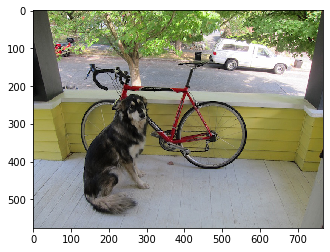

In [3]:
# Input
image_name = "dog.jpg"
image_pil = Image.open(image_name)

transform = transforms.Compose([transforms.ToTensor()])
image = transform(image_pil).float()
image_nchw = torch.unsqueeze(image, 0)
print(image_nchw.size())
plt.imshow(image_pil)

In [4]:
# Exponential linear Unit Function

'''
1. nn.ELU - Applies element-wise, ELU(x)=max(0,x)+min(0,α∗(exp(x)−1))
        - alpha – the α value for the ELU formulation. Default: 1.0
        - inplace – can optionally do the operation in-place. Default: False
'''

print("Module implementation")
m = nn.ELU(alpha = 2.0)
input_data = torch.randn(5)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.elu(input_data, alpha=1.0, inplace=False)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([0.7253, 1.5570, 1.5208, 0.9219, 0.2289])
output =  tensor([0.7253, 1.5570, 1.5208, 0.9219, 0.2289])


Functional implementation
output =  tensor([0.7253, 1.5570, 1.5208, 0.9219, 0.2289])




### Hard Shrinkage Function


2. nn.Hardshrink - Applies the hard shrinkage function element-wise Hardshrink 
        - lambd – the λ value for the Hardshrink formulation. Default: 0.5

    Hard Shrinkage Function:
    
$$\begin{split}\text{HardShrink}(x) = 
\begin{cases}
x, & \text{ if } x > \lambda \\
x, & \text{ if } x < -\lambda \\
0, & \text{ otherwise }
\end{cases}\end{split}
$$


In [5]:
print("Module implementation")
m = nn.Hardshrink(lambd = 0.5)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.hardshrink(input_data, lambd = 0.5)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.1721,  0.2829,  0.8506,  0.2424, -0.9750, -1.5507,  2.2274,  1.0231,
         0.7989, -1.1196])
output =  tensor([ 0.0000,  0.0000,  0.8506,  0.0000, -0.9750, -1.5507,  2.2274,  1.0231,
         0.7989, -1.1196])


Functional implementation
output =  tensor([ 0.0000,  0.0000,  0.8506,  0.0000, -0.9750, -1.5507,  2.2274,  1.0231,
         0.7989, -1.1196])




### Hard Tanh Function


3. nn.Hardtanh - Applies the hard shrinkage function element-wise Hardshrink 
        - min_val – minimum value of the linear region range. Default: -1
        - max_val – maximum value of the linear region range. Default: 1
        - inplace – can optionally do the operation in-place. Default: False


    Hard TanH Function:
    
$$\begin{split}\text{HardTanh}(x) = \begin{cases}
    1 & \text{ if } x > \text{max_value} \\
    -1 & \text{ if } x < \text{min_value} \\
    x & \text{ otherwise } \\
\end{cases}\end{split}$$

In [6]:
print("Module implementation")
m = nn.Hardtanh(min_val = 0.1, max_val = 0.5)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.hardtanh(input_data, min_val = 0.1, max_val = 0.5)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.7285,  0.3120,  0.0152,  0.0379, -0.8249, -0.7795,  0.1058,  0.4144,
        -0.0944,  0.6635])
output =  tensor([0.5000, 0.3120, 0.1000, 0.1000, 0.1000, 0.1000, 0.1058, 0.4144, 0.1000,
        0.5000])


Functional implementation
output =  tensor([0.5000, 0.3120, 0.1000, 0.1000, 0.1000, 0.1000, 0.1058, 0.4144, 0.1000,
        0.5000])




### Leaky ReLU Function


4. nn.LeakyReLU - Applies element-wise, LeakyReLU(x)=max(0,x)+negative_slope∗min(0,x) 
        - negative_slope – Controls the angle of the negative slope. Default: 1e-2
        - inplace – can optionally do the operation in-place. Default: False



    LeakyReLU Function:
    
\begin{split}\text{LeakyRELU}(x) =
\begin{cases}
x, & \text{ if } x \geq 0 \\
\text{negative_slope} \times x, & \text{ otherwise }
\end{cases}\end{split}

In [7]:
print("Module implementation")
m = nn.LeakyReLU(negative_slope = 0.3)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.leaky_relu(input_data, negative_slope = 0.3)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.7663,  0.0331,  0.0623,  0.8337,  2.4741, -0.1478, -0.5326,  0.2739,
         0.7103, -0.2347])
output =  tensor([-0.2299,  0.0331,  0.0623,  0.8337,  2.4741, -0.0444, -0.1598,  0.2739,
         0.7103, -0.0704])


Functional implementation
output =  tensor([-0.2299,  0.0331,  0.0623,  0.8337,  2.4741, -0.0444, -0.1598,  0.2739,
         0.7103, -0.0704])




### Log Sigmoid Function


4. nn.LogSigmoid - Applies element-wise, Log Sigmoid

$$\text{LogSigmoid}(x) = \log\left(\frac{ 1 }{ 1 + \exp(-x)}\right)$$

In [8]:
print("Module implementation")
m = nn.LogSigmoid()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.logsigmoid(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.4063,  0.6202,  1.2416, -1.2245,  0.9337, -1.1852,  0.5047,  0.5151,
        -2.1468,  0.4621])
output =  tensor([-1.6255, -0.4304, -0.2538, -1.4822, -0.3315, -1.4520, -0.4723, -0.4684,
        -2.2573, -0.4886])


Functional implementation
output =  tensor([-1.6255, -0.4304, -0.2538, -1.4822, -0.3315, -1.4520, -0.4723, -0.4684,
        -2.2573, -0.4886])




### P-ReLU Function


5. nn.PReLU - Applies element-wise,PReLU(x)=max(0,x)+a∗min(0,x)
        - num_parameters – number of a to learn. Default: 1
        - init – the initial value of a .Default: 0.25



    PReLU Function:
    
\begin{split}\text{PReLU}(x) =
\begin{cases}
x, & \text{ if } x \geq 0 \\
ax, & \text{ otherwise }
\end{cases}\end{split}

In [9]:
print("Module implementation")
m = nn.PReLU(init=0.4)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.prelu(input_data, weight=torch.tensor([0.4]))
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.5230, -1.8394, -1.3674,  0.2659, -2.0615, -0.6760,  1.6966,  1.0730,
         0.7941, -0.2824])
output =  tensor([-0.6092, -0.7358, -0.5470,  0.2659, -0.8246, -0.2704,  1.6966,  1.0730,
         0.7941, -0.1130], grad_fn=<PreluBackward>)


Functional implementation
output =  tensor([-0.6092, -0.7358, -0.5470,  0.2659, -0.8246, -0.2704,  1.6966,  1.0730,
         0.7941, -0.1130])




### ReLU Function


6. nn.ReLU - Applies element-wise,ReLU(x)=max(0,x)


In [10]:
print("Module implementation")
m = nn.ReLU()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.relu(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.6231, -0.5289,  0.9101, -0.2876,  0.2435, -0.4569, -1.3701, -0.0306,
         0.2891,  1.0640])
output =  tensor([1.6231, 0.0000, 0.9101, 0.0000, 0.2435, 0.0000, 0.0000, 0.0000, 0.2891,
        1.0640])


Functional implementation
output =  tensor([1.6231, 0.0000, 0.9101, 0.0000, 0.2435, 0.0000, 0.0000, 0.0000, 0.2891,
        1.0640])




### ReLU6 Function


7. nn.ReLU6 - Applies the element-wise function ReLU6(x)=min(max(0,x),6)

In [11]:
print("Module implementation")
m = nn.ReLU6()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.relu6(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.6824,  1.0977,  0.6582,  0.5433,  0.4625, -0.9618, -0.1499, -0.2268,
        -0.1179, -1.5176])
output =  tensor([0.0000, 1.0977, 0.6582, 0.5433, 0.4625, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])


Functional implementation
output =  tensor([0.0000, 1.0977, 0.6582, 0.5433, 0.4625, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])




### R-ReLU Function


8. nn.RReLU - Applies the randomized leaky rectified liner unit function element-wise described in the paper Empirical Evaluation of Rectified Activations in Convolutional Network.
        - lower – lower bound of the uniform distribution. Default: 1/8
        - upper – upper bound of the uniform distribution. Default: 1/3
        - inplace – can optionally do the operation in-place. Default: False



    RReLU Function:
    
\begin{split}\text{RReLU}(x) = \begin{cases}
    x & \text{if } x \geq 0 \\
    ax & \text{ otherwise }
\end{cases},\end{split}

In [12]:
print("Module implementation")
m = nn.RReLU(lower = 0.3, upper = 0.6)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.rrelu(input_data, lower = 0.3, upper = 0.6)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.8778,  0.3864, -0.4253, -0.4713,  1.4864,  0.9655,  2.0194,  0.3252,
         0.4450,  2.5084])
output =  tensor([ 0.8778,  0.3864, -0.2465, -0.2478,  1.4864,  0.9655,  2.0194,  0.3252,
         0.4450,  2.5084])


Functional implementation
output =  tensor([ 0.8778,  0.3864, -0.1914, -0.2121,  1.4864,  0.9655,  2.0194,  0.3252,
         0.4450,  2.5084])




### SELU Function


9. nn.SELU - Applies element-wise, SELU(x)=scale∗(max(0,x)+min(0,α∗(exp(x)−1))), 
                with α=1.6732632423543772848170429916717 and 
                scale=1.0507009873554804934193349852946.


In [13]:
print("Module implementation")
m = nn.SELU()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.selu(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-1.8240, -0.2948,  0.1491,  1.3998, -2.0390, -0.2355,  1.1980, -0.6811,
         0.8380,  1.6841])
output =  tensor([-1.4744, -0.4489,  0.1566,  1.4708, -1.5293, -0.3689,  1.2588, -0.8684,
         0.8805,  1.7695])


Functional implementation
output =  tensor([-1.4744, -0.4489,  0.1566,  1.4708, -1.5293, -0.3689,  1.2588, -0.8684,
         0.8805,  1.7695])




### Sigmoid Function


10. nn.Sigmoid - Applies element-wise, Sigmoid

$$\text{Sigmoid}(x) = \frac{1}{1 + \exp(-x)})$$

In [14]:
print("Module implementation")
m = nn.Sigmoid()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.sigmoid(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.3371, -1.8932, -1.7203,  2.4678,  0.6660,  0.4355,  0.4870, -0.0355,
         0.3147, -0.5074])
output =  tensor([0.4165, 0.1309, 0.1518, 0.9219, 0.6606, 0.6072, 0.6194, 0.4911, 0.5780,
        0.3758])


Functional implementation
output =  tensor([0.4165, 0.1309, 0.1518, 0.9219, 0.6606, 0.6072, 0.6194, 0.4911, 0.5780,
        0.3758])




/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


### Softplus Function


11. nn.Softplus - SoftPlus is a smooth approximation to the ReLU function and can be used to constrain the output of a machine to always be positive.
        - beta – the β value for the Softplus formulation. Default: 1
        - threshold – values above this revert to a linear function. Default: 20

$$\text{Softplus}(x) = \frac{1}{\beta} * \log(1 + \exp(\beta * x))$$

In [15]:
print("Module implementation")
m = nn.Softplus(beta=0.1, threshold=10)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softplus(input_data, beta=0.1, threshold=10)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.0790, -0.1705,  1.8224, -0.5328,  1.3204, -0.8685,  1.6195, -1.1482,
        -0.8118, -1.1876])
output =  tensor([6.8921, 6.8466, 7.8841, 6.6686, 7.6135, 6.5066, 7.7740, 6.3738, 6.5338,
        6.3553])


Functional implementation
output =  tensor([6.8921, 6.8466, 7.8841, 6.6686, 7.6135, 6.5066, 7.7740, 6.3738, 6.5338,
        6.3553])




### Softshrink Function


12. nn.Softshrink - Applies the soft shrinkage function elementwise
        - lambd – the λ value for the Softshrink formulation. Default: 0.5

    SoftShrink Function - 

$$\begin{split}\text{SoftShrinkage}(x) =
\begin{cases}
x - \lambda, & \text{ if } x > \lambda \\
x + \lambda, & \text{ if } x < -\lambda \\
0, & \text{ otherwise }
\end{cases}\end{split}$$

In [16]:
print("Module implementation")
m = nn.Softshrink(lambd=0.2)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softshrink(input_data, lambd=0.2)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.4670, -2.6819,  0.5475, -0.1177, -1.2492, -0.8291,  0.1299,  0.0121,
         0.8856, -1.8798])
output =  tensor([ 1.2670, -2.4819,  0.3475,  0.0000, -1.0492, -0.6291,  0.0000,  0.0000,
         0.6856, -1.6798])


Functional implementation
output =  tensor([ 1.2670, -2.4819,  0.3475,  0.0000, -1.0492, -0.6291,  0.0000,  0.0000,
         0.6856, -1.6798])




### Softsign Function


13. nn.Softsign - Applies element-wise, the softsign function

    Softsign Function - 

$$\text{SoftSign}(x) = \frac{x}{ 1 + |x|}$$

In [17]:
print("Module implementation")
m = nn.Softsign()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softsign(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.3837, -1.1519,  1.2448, -0.5572,  0.5634, -1.3444,  0.5747,  0.9749,
         1.1096, -0.9915])
output =  tensor([-0.2773, -0.5353,  0.5545, -0.3578,  0.3604, -0.5734,  0.3650,  0.4936,
         0.5260, -0.4979])


Functional implementation
output =  tensor([-0.2773, -0.5353,  0.5545, -0.3578,  0.3604, -0.5734,  0.3650,  0.4936,
         0.5260, -0.4979])




### TanH Function


14. nn.Tanh - Applies element-wise, Tanh function

    TanH Function - 

$$\text{Tanh}(x) = \tanh(x) = \frac{e^x - e^{-x}} {e^x + e^{-x}}$$

In [18]:
print("Module implementation")
m = nn.Tanh()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.tanh(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.1515,  1.1365, -1.9649,  0.6115,  2.1806, -1.1284,  0.1966, -0.7474,
         1.1861,  0.4207])
output =  tensor([ 0.8182,  0.8132, -0.9615,  0.5452,  0.9748, -0.8105,  0.1941, -0.6336,
         0.8294,  0.3975])


Functional implementation
output =  tensor([ 0.8182,  0.8132, -0.9615,  0.5452,  0.9748, -0.8105,  0.1941, -0.6336,
         0.8294,  0.3975])




/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### TanhShrink Function


15. nn.Tanhshrink - Applies element-wise, Tanhshrink function

    Tanhshrink Function - 

$$\text{Tanhshrink}(x) = x - \text{Tanh}(x)$$

In [19]:
print("Module implementation")
m = nn.Tanhshrink()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.tanhshrink(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.6874, -1.8331,  0.3286,  0.1431,  0.2577, -0.4590,  0.6913, -1.6779,
        -0.0551, -0.8634])
output =  tensor([ 9.1107e-02, -8.8301e-01,  1.1338e-02,  9.6871e-04,  5.5601e-03,
        -2.9735e-02,  9.2488e-02, -7.4535e-01, -5.5652e-05, -1.6539e-01])


Functional implementation
output =  tensor([ 9.1107e-02, -8.8301e-01,  1.1338e-02,  9.6871e-04,  5.5601e-03,
        -2.9735e-02,  9.2488e-02, -7.4535e-01, -5.5652e-05, -1.6539e-01])




### Threshold Function


16. nn.Threshold - Thresholds each element of the input Tensor
        - threshold – The value to threshold at
        - value – The value to replace with
        - inplace – can optionally do the operation in-place. Default: False


    Threshold Function - 

$$\begin{split}y =
\begin{cases}
x, &\text{ if } x > \text{threshold} \\
\text{value}, &\text{ otherwise }
\end{cases}\end{split}$$

In [20]:
print("Module implementation")
m = nn.Threshold(threshold = 0.3, value = 4)
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.threshold(input_data, threshold = 0.3, value = 4)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 1.9814, -0.6506, -0.4766, -1.3144, -0.5565,  0.2985,  0.5101,  0.6978,
        -0.7160, -1.7772])
output =  tensor([1.9814, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 0.5101, 0.6978, 4.0000,
        4.0000])


Functional implementation
output =  tensor([1.9814, 4.0000, 4.0000, 4.0000, 4.0000, 4.0000, 0.5101, 0.6978, 4.0000,
        4.0000])




### Softmin Function


17. nn.Softmin - Applies the Softmin function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0, 1) and sum to 1
        


    Softmin Function - 

$$\text{Softmin}(x_{i}) = \frac{\exp(-x_i)}{\sum_j \exp(-x_j)}$$

In [21]:
print("Module implementation")
m = nn.Softmin()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softmin(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.3850,  0.6356, -0.6082,  0.5937, -0.8379,  1.1058, -1.0081, -0.1084,
        -0.0941, -0.5689])
output =  tensor([0.0525, 0.0409, 0.1417, 0.0426, 0.1783, 0.0255, 0.2114, 0.0860, 0.0848,
        0.1363])


Functional implementation
output =  tensor([0.0525, 0.0409, 0.1417, 0.0426, 0.1783, 0.0255, 0.2114, 0.0860, 0.0848,
        0.1363])




/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmin has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


### Softmax Function


18. nn.Softmax - Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1
        
    Softmax Function - 

$$\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$$

In [22]:
print("Module implementation")
m = nn.Softmax()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.softmax(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([ 0.5452, -1.1410, -0.2092,  0.4311,  0.2587,  1.2989, -2.1879, -0.4422,
         0.6928, -1.3905])
output =  tensor([0.1396, 0.0259, 0.0656, 0.1245, 0.1048, 0.2966, 0.0091, 0.0520, 0.1618,
        0.0201])


Functional implementation
output =  tensor([0.1396, 0.0259, 0.0656, 0.1245, 0.1048, 0.2966, 0.0091, 0.0520, 0.1618,
        0.0201])




/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


### Softmax2d Function


19. nn.Softmax2d - Applies SoftMax over features to each spatial location.

Module implementation
output shape =  torch.Size([1, 3, 576, 768])




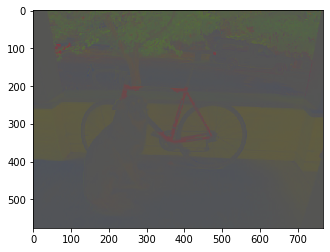

In [23]:
print("Module implementation")
m = nn.Softmax2d()
output = m(image_nchw)
print("output shape = ", output.size())
print("\n")

# Visualizing
output = torch.squeeze(output)
transform = transforms.Compose([transforms.ToPILImage(mode=None)])
output_pil = transform(output)
plt.imshow(output_pil)

### Log-Softmax Function


20. nn.LogSoftmax - Applies the Log(Softmax(x)) function to an n-dimensional input Tensor. The LogSoftmax formulation can be simplified as
        
    Softmax Function - 

$$\text{LogSoftmax}(x_{i}) = \log\left(\frac{\exp(x_i) }{ \sum_j \exp(x_j)} \right)$$

In [24]:
print("Module implementation")
m = nn.LogSoftmax()
input_data = torch.randn(10)
output = m(input_data)
print("input = ", input_data)
print("output = ", output)
print("\n")

print("Functional implementation")
output = F.log_softmax(input_data)
print("output = ", output)
print("\n")

Module implementation
input =  tensor([-0.0728, -2.0750,  0.6847,  0.3369, -0.6657, -2.5721, -0.1554, -0.0701,
        -0.5735, -0.3682])
output =  tensor([-2.1613, -4.1636, -1.4039, -1.7517, -2.7542, -4.6607, -2.2440, -2.1586,
        -2.6620, -2.4567])


Functional implementation
output =  tensor([-2.1613, -4.1636, -1.4039, -1.7517, -2.7542, -4.6607, -2.2440, -2.1586,
        -2.6620, -2.4567])




/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
/home/abhi/.virtualenvs/study_pytorch_test/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


## Author - Tessellate Imaging - https://www.tessellateimaging.com/

## Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning

### Monk features
- low-code
- unified wrapper over major deep learning framework - keras, pytorch, gluoncv
- syntax invariant wrapper


### Enables
- to create, manage and version control deep learning experiments
- to compare experiments across training metrics
- to quickly find best hyper-parameters


### At present it only supports transfer learning, but we are working each day to incorporate
- GUI based custom model creation
- various object detection and segmentation algorithms
- deployment pipelines to cloud and local platforms
- acceleration libraries such as TensorRT
- preprocessing and post processing libraries

## To contribute to Monk AI or Pytorch RoadMap repository raise an issue in the git-repo or dm us on linkedin 
 - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
 - Akash - https://www.linkedin.com/in/akashdeepsingh01/